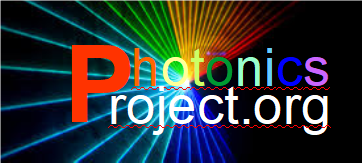
## Function: Modulation Transfer Function

In [ ]:
#OPTICS and DETECTOR MTF
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.cm as cm

WVL1,WVL2 = input('Enter shorter SPACE longer WVL in microns:').split()  #3.0 #um
WVL2=float(WVL2)
WVL1=float(WVL1)
EFL,APT = input("Enter EFL and Apeture both in cm:").split()
EFL=float(EFL)
APT=float(APT)
dpitch = float(input('Enter detector pitch in microns:'))    #12 #um
Dist=EFL

ocutoff = round(1/(WVL1*1E-06/(APT*0.01)*(Dist*0.01)*1000),2) #lp/mm
print ("F/# = ", round(Dist/APT,2))
print ('Cutoff1 =',ocutoff, 'lp/mm   for Wavelenght ',WVL1)

numpts = 80  #arbitrary number of points to plot 
step = ocutoff/numpts  #step size 
lpscale = np.arange(0, ocutoff, step) #line pairs per mm scale = x axis (lp/mm)
ratio = lpscale/ocutoff
pi=math.pi
MTF = lpscale/3 #initialize to any floating point same size as lpscale
cnt=0
for i in range(1,numpts+1):
    MTF[cnt]= 2/pi*(math.acos(ratio[cnt]) -  ratio[cnt]*math.sqrt(1-(ratio[cnt])**2))
    #print(MTF[cnt],lpscale[cnt], cnt)
    cnt+=1

#vertical line at cutoff1
vlinex = np.repeat(ocutoff, 5)
vliney = vlinex * 3
count=0
for i in vlinex:
    vliney[count] = (count/3)
    count +=1       

    
    
plt.figure(figsize=(16,6))
plt.subplot(121)    
    
#plot optics MTF first wvl
#plt.figure(figsize=(12,6)) 
plt.plot(lpscale, MTF,'bo', label='Wavelenght1 = ' + str(WVL1))  # blue
plt.plot(lpscale, MTF,color='blue')
plt.text(ocutoff+1, 0.4, " Cutoff1= " + str(ocutoff) + "lp/mm",color='blue',rotation='90')
plt.text(ocutoff/16,0.13, "F/# = " + str(round(Dist/APT,2)) ,color='black')
plt.plot(vlinex,vliney, 'b:')
plt.title('Optics Modulation Transfer Function')  
plt.xlabel('lp/mm')
plt.ylabel('MTF')
plt.xlim(0, ocutoff*1.1)
plt.ylim(0, 1)
plt.grid(True)
#plt.show() #dont show plot till second wavelenght is done

#OPTICS MTF SECOND Wavelenght
ocutoff2 = round(1/(WVL2*1E-06/(APT*0.01)*(Dist*0.01)*1000),2) #lp/mm
print ('Cutoff2 =',ocutoff2, 'lp/mm   for Wavelenght ',WVL2)
ratio3 = lpscale/ocutoff2
MTF2 = lpscale/3 #use MTF2 for second optics MTF
cnt=0
for J in range(1,numpts+1):
    #MTF2[cnt]= 2/pi*(math.acos(ratio2[cnt]) - ratio2[cnt]*math.sqrt(1-(ratio2[cnt])**2))
    if (ratio3[cnt] < 1):
        MTF2[cnt]= 2/pi*(math.acos(ratio3[cnt]) - ratio3[cnt]*math.sqrt(1-(ratio3[cnt])**2))
    else:
        MTF2[cnt]=0.0
    #print(MTF2[cnt],MTF3[cnt],lpscale2[cnt],cnt)
    cnt+=1

#vertical line at cutoff2
vlinex = np.repeat(ocutoff2, 5)
vliney = vlinex * 3
count=0
for i in vlinex:
    vliney[count] = (count/3)
    count +=1   
#overplot second wvl
plt.plot(lpscale, MTF2,'r*', label='Wavelenght2 = ' + str(WVL2))  #red color for second longer wavelenght
plt.plot(lpscale,MTF2,color='red')
plt.plot(vlinex,vliney, 'r:')
plt.text(ocutoff2+1, 0.4, " Cutoff2= " + str(ocutoff2) + "lp/mm",color='red',rotation='90')
plt.legend(loc='best')



#DETECTOR PITCH MTF  - sinc function
#dpitch = 12 #um
dcutoff = round(1/(dpitch*1E-03*2),2) #lp/mm
print ('Nyquist =',dcutoff, 'lp/mm for Detector Pitch =', dpitch,'um')
dnumpts = numpts #use sampe as optics MTF = number of step to first zero (1/3 of total)
dstep = dcutoff/dnumpts
znumpts = 10 #approx number of detector pitch values which is the z axis  (seems to be 2 less than this)
zdp = int(znumpts/2) - 1 #target design pitch above.
dmult = 6 #use 3 to 6X the nyquist freq for plot to show sinc behaviour
dlpscale = np.arange(0, dmult*dcutoff, dstep)
#compute detecotr MTF seperately to plot stand alone on its own scale so zero's are captured
dMTF = dlpscale/5 #detector MTF initialize to any floating point same size as lpscale
dMTF2 = lpscale/5 #match to lens lpscale
MTF3D = np.zeros((znumpts, dnumpts)) #MTF's with sweep of detector pitches for 3D plot
MTF3D2 = np.zeros((znumpts, dnumpts)) #second wvl for above
#xx=np.zeros((znumpts, dnumpts))#array of detector pitches
#yy=np.zeros((znumpts, dnumpts))#array of detector pitches
cntj=1
for j in range(1, znumpts): 
    cnt=1
    dMTF[0]= 1.0  #sinc function does not like the first zero
    dMTF2[0]= 1.0
    for i in range(0,dmult*dnumpts-1):
        dMTF[cnt]= abs(math.sin(dpitch*1E-03*pi*dlpscale[cnt])/(dpitch*1E-03*pi*dlpscale[cnt]))
        if (cnt < numpts): #number pf points for optics MTF may differ from Detector numpts 
            dMTF2[cnt]= abs(math.sin((zdp*dpitch/cntj)*1E-03*pi*lpscale[cnt])/((zdp*dpitch/cntj)*1E-03*pi*lpscale[cnt])) #matches lpscale of optics
            #yy[j][i]= zdp*dpitch/cnt
            #xx[j][i]= lpscale[cnt]
            #print(dpitch,cnt,cntj,dpitch/cntj,dMTF[cnt],dMTF2[cnt])               
        cnt+=1
    #compute composite MTF optics * detector
    if (cntj==zdp): #zdp iteration is the design pitch
        CMTFW1 = MTF * dMTF2 #compute composite MTF on independant detector dlp scale 
        CMTFW2 = MTF2 * dMTF2 #second wvl     
    MTF3D[cntj] = dMTF2*MTF #compute composite MTF on optics lp scale
    MTF3D2[cntj] = dMTF2*MTF2
    cntj+=1
    
#vertical line at cutoff1
vlinex = np.repeat(dcutoff, 5)
vliney = vlinex * 3
count=0
for i in vlinex:
    vliney[count] = (count/3)
    count +=1       

#plot Detector MTF    
#plt.figure(figsize=(12,6)) 
plt.subplot(122)
plt.plot(dlpscale, dMTF,'ko', label='Detector Pitch = ' + str(dpitch)+ 'um')  # black
plt.plot(dlpscale, dMTF,color='green')
plt.text(dcutoff+1, 0.4, " Nyquist = " + str(dcutoff) + " lp/mm",color='red',rotation='90')
plt.plot(vlinex,vliney, 'r:')
plt.title('Detector Sampling Modulation Transfer Function')  
plt.xlabel('lp/mm')
plt.ylabel('MTF')
plt.xlim(0, dmult*dcutoff)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='best')


#plot composite MTF for WVL1 and WVL2
plt.figure(figsize=(14,6))
plt.plot(lpscale, CMTFW1,'bo', label='WVL1 = ' + str(WVL1)+ 'um')  # blue
plt.plot(lpscale, CMTFW1)
#plt.text(dcutoff-15, 0.81, " Nyquist = " + str(dcutoff) + " lp/mm",color='red')
#plt.plot(vlinex,vliney, 'r:')
plt.plot(lpscale, CMTFW2,'ro', label='WVL2 = ' + str(WVL2)+ 'um')  # red
plt.plot(lpscale, CMTFW2)
plt.title('Composite Modulation Transfer Function')  
plt.xlabel('lp/mm')
plt.ylabel('MTF')
plt.xlim(0, ocutoff*1.1)
plt.ylim(0,1)
#plt.ylim(0.0001, 1)
#plt.yscale('log')
plt.grid(True)
plt.legend(loc='best')


#rainbow line plot - vary detector pitch plus 4, minus 3
colors=cm.rainbow(np.linspace(0,1,znumpts))
plt.style.use('dark_background')
plt.figure(figsize=(14,6))
plt.xlim(0,ocutoff)
plt.ylim(0, 1)
plt.grid(True)
plt.title('MTFs for detector pitch sweep')  
plt.xlabel('lp/mm',color='black')
plt.ylabel('MTF',color='black')
cntk=1
for k in range (1, znumpts-1):      
    plt.plot(lpscale,MTF3D[cntk],color=colors[k],linewidth=1.0,alpha=0.80)
    cntk+=1
plt.plot(lpscale,MTF3D[zdp],linewidth= 3.0,linestyle = ':',label='Detector Pitch = ' + str(dpitch)+ 'um',color='white')
plt.text(dcutoff+1, 0.4, " Nyquist = " + str(dcutoff) + " lp/mm",color='red',rotation='90')
plt.plot(vlinex,vliney, 'r:')
plt.legend(loc='best')





